In [2]:
# To make sure to be in the right Python virtual environment
import sys
print(sys.executable)

/home/kabbalow/datacraft/rust_for_data_science/.venv/bin/python


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.cluster import KMeans
import sklearn.datasets as datasets

# Rust import
import ml_demos_rs

In [ ]:
x = np.random.rand(1000000)
y = np.random.rand(1000000)

# Python 
def euclidean(x, y): 
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return np.sqrt(s)

start = time.time()
dist_py = euclidean(x, y)
print("Python time :", time.time() - start)
print("Python result :", dist_py)

# Rust
start = time.time()
dist_rust = ml_demos_rs.euclidean(x, y)
print("Rust time :", time.time() - start)
print("Rust result :", dist_rust)

Python time : 0.4548053741455078
Python result : 408.6462692717665
Rust time : 0.5204339027404785
Rust result : 408.6462653924251


In [22]:
X_digits, Y_digits = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X_digits = np.array(X_digits[0:100])
Y_digits = np.array(Y_digits[0:100])
X_digits_flat = X_digits.reshape(X_digits.shape[0], -1).astype(np.float64)

n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))

Python time : 0.04096364974975586
Python result : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


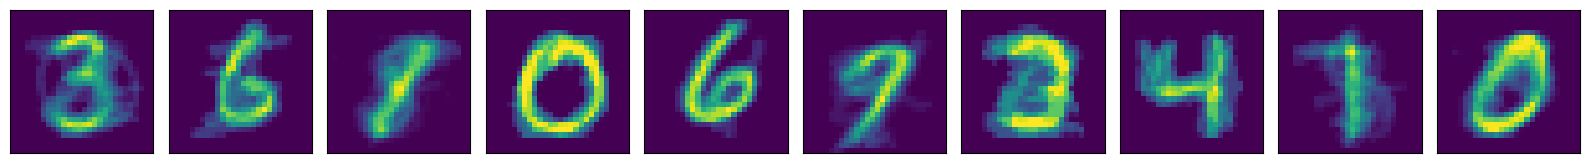

In [34]:
n_clusters = n_digits

# Python
start = time.time()
kmeans = KMeans(n_clusters=n_digits, init="k-means++")
model=kmeans.fit(X_digits_flat)
centroids_py = model.cluster_centers_
# clusters=model.predict(X_digits)
print("Python time :", time.time() - start)
print("Python result :", centroids_py)

plt.figure(figsize=(16,6))
for i in range(n_clusters):
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroids_py[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Rust time : 5.732076406478882
Rust result : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


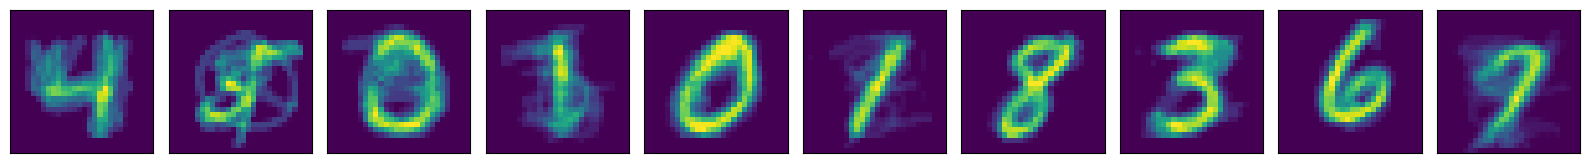

In [ ]:
# Rust
start = time.time()
centroids_rust = np.array(ml_demos_rs.linfa_kmeans_test(n_digits, X_digits_flat))
print("Rust time :", time.time() - start)
print("Rust result :", centroids_rust)

plt.figure(figsize=(16,6))
for i in range(n_clusters):
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroids_rust[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()